<a href="https://colab.research.google.com/github/qixuan-code/2021_TAMU/blob/main/2021TAMU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import warnings
from collections import Counter
warnings.filterwarnings('ignore')
from sklearn import metrics

In [6]:
url = 'https://raw.githubusercontent.com/qixuan-code/2021_TAMU/main/ETF_price_volume_ordered.csv'
df_ETF = pd.read_csv(url,na_values='na')

In [7]:
df_ETF['SYMBOL'].unique()

array(['SPY', 'XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLRE', 'XLU',
       'XLV'], dtype=object)

In [23]:
ordered_df_ETF = df_ETF.sort_values(by=['YEAR'])

In [40]:
df_SPY = ordered_df_ETF[df_ETF['SYMBOL'] == 'SPY']
df_XLB = ordered_df_ETF[df_ETF['SYMBOL'] == 'XLB']
df_XLE = ordered_df_ETF[df_ETF['SYMBOL'] == 'XLE']
df_XLF = ordered_df_ETF[df_ETF['SYMBOL'] == 'XLF']
df_XLI = ordered_df_ETF[df_ETF['SYMBOL'] == 'XLI']
df_XLK = ordered_df_ETF[df_ETF['SYMBOL'] == 'XLK']
df_XLP = ordered_df_ETF[df_ETF['SYMBOL'] == 'XLP']
df_XLRE = ordered_df_ETF[df_ETF['SYMBOL'] == 'XLRE']
df_XLU = ordered_df_ETF[df_ETF['SYMBOL'] == 'XLU']
df_XLV = ordered_df_ETF[df_ETF['SYMBOL'] == 'XLV']

In [38]:
list(df_SPY['SYMBOL'].unique())

['SPY']

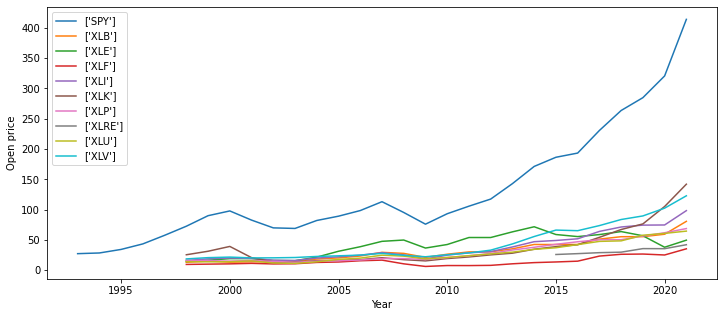

In [41]:
plt.figure(figsize=(12,5))
for df in [df_SPY,df_XLB,df_XLE,df_XLF,df_XLI,df_XLK,df_XLP,df_XLRE,df_XLU,df_XLV]:
  plt.plot(df['YEAR'],df['OPEN_PRICE'],label = list(df['SYMBOL'].unique()))
  plt.legend()
  plt.xlabel('Year')
  plt.ylabel('Open price')

In [ ]:
COLUMNS = ['AVG(OPEN)','YEAR(DATE)','SECTOR']
average_price = merged_table1[COLUMNS]
df_filter = average_price[average_price['YEAR(DATE)'] == 1970]
AVE_OPEN_Price = pd.pivot_table(average_price, index=["YEAR(DATE)"], columns=["SECTOR"], values=["AVG(OPEN)"], aggfunc=np.mean)

In [ ]:
AVE_OPEN_Price

AVG(OPEN)            ...                           
SECTOR     Basic Materials  Building  ...   Technology     Utilities
YEAR(DATE)                            ...                           
1970          1.542641e+00       NaN  ...     0.599014      0.373868
1971          1.640740e+00       NaN  ...     0.673202      0.457064
1972          1.108189e+00       NaN  ...     0.808884      0.661924
1973         -6.623798e-01       NaN  ...    30.349321     -4.548780
1974         -1.192292e+00       NaN  ...    24.374304     -3.378608
1975         -1.325585e+00       NaN  ...    24.405308     -3.546424
1976         -1.493216e+00       NaN  ...    26.521603     -4.027104
1977         -1.470781e+00       NaN  ...    16.023045     -4.383848
1978         -1.448356e+00       NaN  ...    14.470487     -4.232147
1979         -1.218843e+00       NaN  ...    14.644250     -4.039954
1980          9.011749e+03       NaN  ...     4.727733     -2.897712
1981          2.451493e+04       NaN  ...     2.568774     -2.586011
1982          3.990175e+04       NaN  ...     2.378402     -2.943781
1983          1.206893e+04       NaN  ...     3.383417     -3.117071
1984          2.584655e+04       NaN  ...     4.128174     -2.358784
1985          1.668724e+04       NaN  ...     4.814648     -1.462098
1986          2.289222e+05       NaN  ...     4.465963     -1.407819
1987          8.584760e+05       NaN  ...     7.723044     -0.510981
1988          8.956644e+05       NaN  ...     7.006428      2.029140
1989          1.294017e+06       NaN  ...     6.276604      2.678083
1990          1.029923e+06       NaN  ...     4.742503      8.548620
1991          5.845016e+05       NaN  ...    57.546373      6.700005
1992          3.992334e+05       NaN  ...   166.342626      6.865532
1993          3.324051e+05       NaN  ...  1984.375395      7.689879
1994          3.281805e+05       NaN  ...  1600.491299      7.672828
1995          3.590216e+05       NaN  ...  1188.830968      8.430698
1996          2.141711e+05       NaN  ...  1207.764914      8.946946
1997          2.745966e+05       NaN  ...   671.956004      9.831179
1998          3.357904e+05       NaN  ...   680.711216     12.389016
1999          3.416107e+05       NaN  ...   491.804044     12.489061
2000          2.844045e+05       NaN  ...  2239.983843  17117.792222
2001          2.814564e+05       NaN  ...   548.698752  28676.956019
2002          2.734951e+05       NaN  ...   274.087717  31259.142023
2003          2.354640e+05       NaN  ...   428.098902  32057.449012
2004          2.693496e+05       NaN  ...   294.714468  58192.646155
2005          3.305280e+05       NaN  ...   141.278654  41889.439795
2006          3.825506e+05       NaN  ...   122.681488     19.524068
2007          6.286186e+05       NaN  ...   157.248403     58.424553
2008          6.821284e+05       NaN  ...    87.897397     66.555505
2009          3.695186e+05       NaN  ...    70.425431     32.041779
2010          5.959157e+05       NaN  ...    72.120415     35.071439
2011          1.301799e+06       NaN  ...   210.945803     34.569509
2012          1.276668e+06       NaN  ...   328.673131     22.796347
2013          1.401715e+06       NaN  ...   322.188655     39.844307
2014          6.551166e+05  6.495159  ...   378.510921     37.060771
2015          3.552072e+05  4.276190  ...    70.858093     27.299559
2016          1.525336e+05  4.259603  ...    47.100966     27.135273
2017          2.697387e+05  3.401275  ...    77.916478     31.444403
2018          3.518737e+05  3.180398  ...    49.358453     31.703252
2019          1.705555e+05  3.225913  ...    46.839567     36.452350
2020          3.594013e+04  1.187762  ...    54.826083     36.423935
2021          4.772040e+01  1.771250  ...    90.764841     38.893401

[52 rows x 18 columns]

In [ ]:
AVE_OPEN_Price.to_csv('AVERAGE_OPEN_PRICE_per_year.csv')
from google.colab import files
files.download("AVERAGE_OPEN_PRICE_per_year.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

SUM_Volume_per_year

In [ ]:
columns = ['AVG(VOLUME)','YEAR(DATE)','SECTOR']
year_volume = merged_table1[columns]
Total_year_Volume =  pd.pivot_table(year_volume, index=["YEAR(DATE)"], columns=["SECTOR"], values=["AVG(VOLUME)"], aggfunc=np.sum)

In [ ]:
Total_year_Volume.to_csv('SUM_Volume_per_year.csv')
from google.colab import files
files.download("SUM_Volume_per_year.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>